# Tutorial 3: load a pre-calculated LIM

Code developed by Jaime Renedo Anglada (renedo.jaime@gmail.com) and Borja Marazuela.

This notebook presents an example of the usage of the class developed for the study of single-sided linear induction motors. 

This notebook should be used to learn how to use the class but not as a "design tool". 

In this tutorial the pre-calculated machine (it has all the performance data in the file) is loaded from a json file where all the data is written. 

The class is defined in the file LIM_class_def.py

## Libraries needed and constants:

In [1]:
import math
import cmath
import numpy as np

import matplotlib.pyplot as plt

from LIM_class_def import SLIM_machine # class for the study of the LIMs

## Constants: 
j = complex(0,1)
pi = math.pi # define pi

## Define the geometry

# complex variable for the equations:
mu_0 = 4*pi*10.0**-7 # vacuum permeability

## SLIM class usage

Definition of a precalculated machine: 

In [2]:
# define the machine using the class:
Machine_A = SLIM_machine() # Create the object
Machine_A.import_full_machine('full_machine_tutorial.json') # import a calculated machine

Machine_A.export_SLIM_basic_properties() # save the properties in a .json file that can be used to create the same machine later

# The name of the machine is given by defect with the time and user name, we can change it like this:
Machine_A.name = 'tutorial_machine_3' # this will be the name of the folder created with the data files

Generate the report and save the data in a .json file. The data is saved in a folder created with the same name as the machine (which by default it has the date and the user name).

In [4]:
Machine_A.export_full_machine() # generates a json file in the folder called "full_machine.json"

#Machine_A.generate_report() # generates a report for the user in excel called "SLIM_report.xlsx"


Post-processing: 

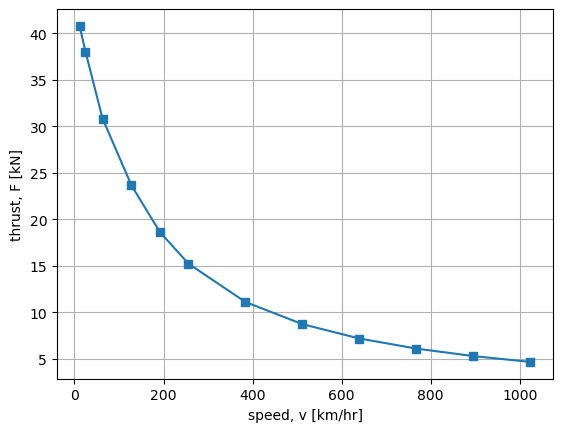

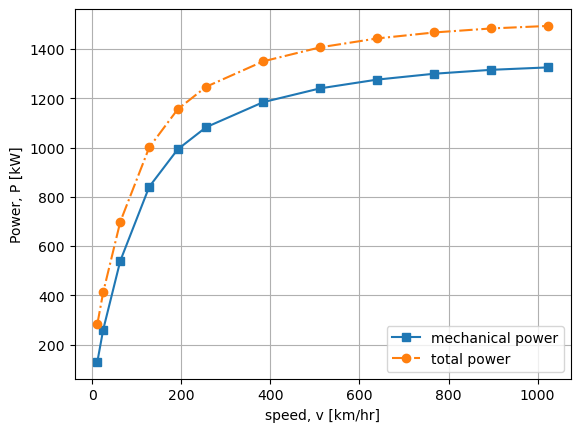

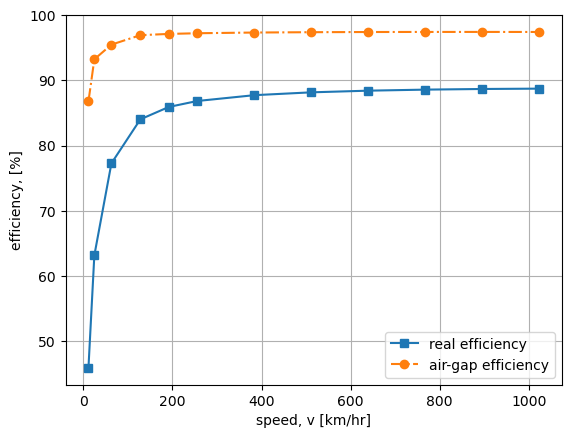

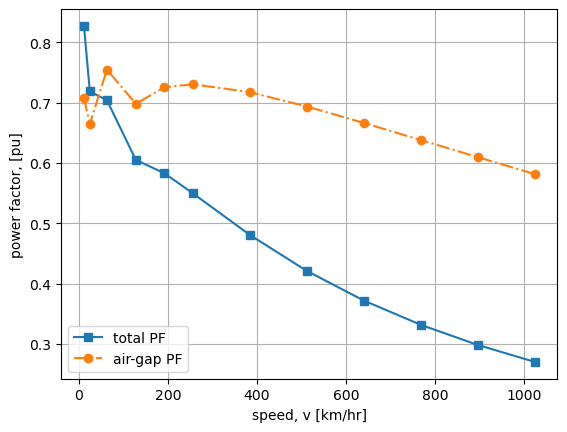

In [5]:
# To get the results:

# Maximum thrust as a function of speed:
v_max = Machine_A.v_max
thrust_max = Machine_A.thrust_max

# active power:
P_tot_max = Machine_A.P_tot_max

# efficiency:
eff_max = Machine_A.eff_max
eff_gap_max = Machine_A.eff_gap_max

# Power factor:
PF_max = Machine_A.PF_max
PF_gap_max = Machine_A.PF_gap_max

# Also the matrices with the more detailed information:
vec_slip = Machine_A.vec_slip # vector of slips
v_mat = Machine_A.v_mat # matrix of speeds
thrust_mat = Machine_A.thrust_mat # matrix of thrust
Fy_mat = Machine_A.Fy_mat # matrix of thrust

# Plot the results:

# maximum thrust
plt.plot(v_max*3.6,thrust_max/1000,'s-')

plt.ylabel("thrust, F [kN]")
plt.xlabel("speed, v [km/hr]")
plt.grid()

plt.savefig('max_thrust.png', dpi=300)
plt.show()

# maximum power:
plt.plot(v_max*3.6,np.multiply(thrust_max,v_max/1000),'s-')
plt.plot(v_max*3.6,P_tot_max/1000,'o-.')

plt.ylabel("Power, P [kW]")
plt.xlabel("speed, v [km/hr]")
plt.grid()

plt.legend(('mechanical power', 'total power'), loc='lower right')

plt.savefig('max_power.png', dpi=300)
plt.show()

# Efficiency:

plt.plot(v_max*3.6,eff_max*100,'s-')
plt.plot(v_max*3.6,eff_gap_max*100,'o-.')

plt.ylabel("efficiency, [%]")
plt.xlabel("speed, v [km/hr]")
plt.grid()
plt.legend(('real efficiency', 'air-gap efficiency'), loc='lower right')

plt.savefig('max_efficiency.png', dpi=300)
plt.show()

# Power factor:

plt.plot(v_max*3.6,PF_max,'s-')
plt.plot(v_max*3.6,PF_gap_max,'o-.')

plt.ylabel("power factor, [pu]")
plt.xlabel("speed, v [km/hr]")
plt.grid()
plt.legend(('total PF', 'air-gap PF'), loc='lower left')

plt.savefig('max_PF.png', dpi=300)
plt.show()

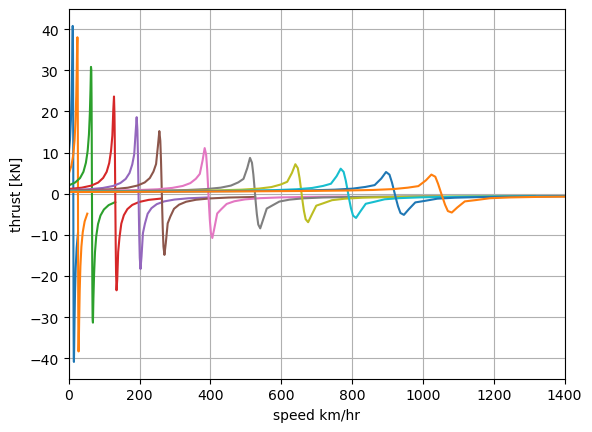

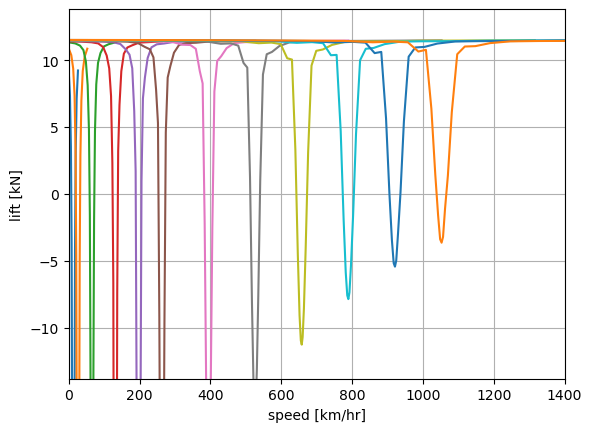

In [6]:
f_vec_elec = Machine_A.f_vec_elec

# Machine A: 
thrust_mat_1 = Machine_A.thrust_mat
Fy_mat_1 = Machine_A.Fy_mat
v_mat_1 = Machine_A.v_mat

# Thrust speed characteristic
n_elements = len(f_vec_elec)
vmax_plot = 1400

for k in range(n_elements):
    plt.plot(3.6*v_mat_1[k,:], np.transpose(thrust_mat_1[k,:])/1000,'-')

plt.xlabel("speed km/hr")
plt.ylabel("thrust [kN]")
plt.xlim(0, vmax_plot)
plt.grid()
plt.savefig('comparison_thrust_speed.png', dpi=300)

plt.show()

max_lift = np.amax(Fy_mat_1[k,:])/1000

for k in range(n_elements):
    plt.plot(3.6*v_mat_1[k,:], np.transpose(Fy_mat_1[k,:])/1000,'-')

plt.xlabel("speed [km/hr]")
plt.ylabel("lift [kN]")
plt.grid()
plt.ylim(-1.2*max_lift, 1.2*max_lift)
plt.xlim(0, vmax_plot)
plt.savefig('comparison_lift_speed.png', dpi=300)

plt.show()

